### Healthcare Cost Drivers: A Data-Driven Statistical Exploration

In [266]:
# HEALTH INSURANCE DATASET

In [267]:
import warnings
warnings.filterwarnings("ignore")

#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
# Importing the dataset

df = pd.read_csv("C:/Users/Aditya Saxena/Downloads/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [269]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [271]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [272]:
# Checking for duplicated values

df.duplicated().sum()

1

In [273]:
duplicates = df[df.duplicated()]
print(duplicates)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [274]:
dfI = df.drop_duplicates()

In [275]:
dfI

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [276]:
# Checking for missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### EXPLORATORY DATA ANALYSIS

Age Distribution of the Insured Population

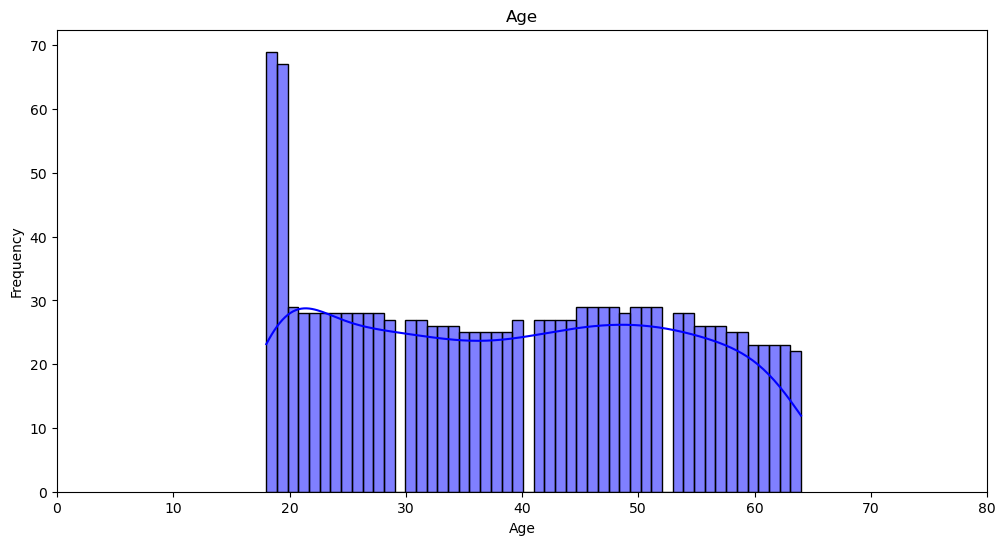

In [277]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dfI, x="age", kde=True, bins=50,
             color="blue", edgecolor="black")
plt.xticks(np.arange(0,90,10))
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.grid(False)
plt.show()

Right-Skewed – The frequency tends to decrease as age increases, though there are periodic gaps.

INTERPRETATION

Young Adult:

>A large concentration of individuals in their early 20s suggests many policyholders might be young adults.

>This could be due to dependent coverage plans, where young adults remain on their parents' insurance until a certain age.


Middle-Age Distribution (30s-60s):
>There is a relatively even distribution from ages 30 to 60, indicating a significant number of working-age individuals purchasing their own policies.

Possible Gaps in Certain Age Groups:
>The visible gaps in the distribution could be due to specific eligibility criteria or renewal cycles in insurance policies.

>If life insurance is typically renewed or purchased at fixed intervals (e.g., every 12 years), it could explain the observed gaps.

>Another possible explanation is missing or underrepresented age groups in the dataset.

Older Ages (>60s):
>The dataset shows fewer individuals in their senior years (60+), which might indicate:

>Government insurance programs covering older adults, reducing their presence in private insurance datasets.

>Lower demand for private healthcare plans among retirees.


POSSIBLE BUSINESS INSIGHTS:

>The peak at early 20s suggests targeted marketing for young adults transitioning off family plans could be beneficial.

>The steady presence of middle-aged individuals suggests they are key customers for long-term policies and supplemental plans.

>The drop-off in senior ages indicates that insurers could expand offerings for retirees or develop supplemental plans for government-covered individuals.


BMI Distribution of the Insured Population

BMI Categories:

>Underweight: BMI < 18.5

>Normal weight: 18.5 ≤ BMI < 25

>Overweight: 25 ≤ BMI < 30

>Obese: BMI ≥ 30

>Class 1 obesity: 30 ≤ BMI < 35

>Class 2 obesity: 35 ≤ BMI < 40

>Class 3 obesity: BMI ≥ 40 (severe obesity)

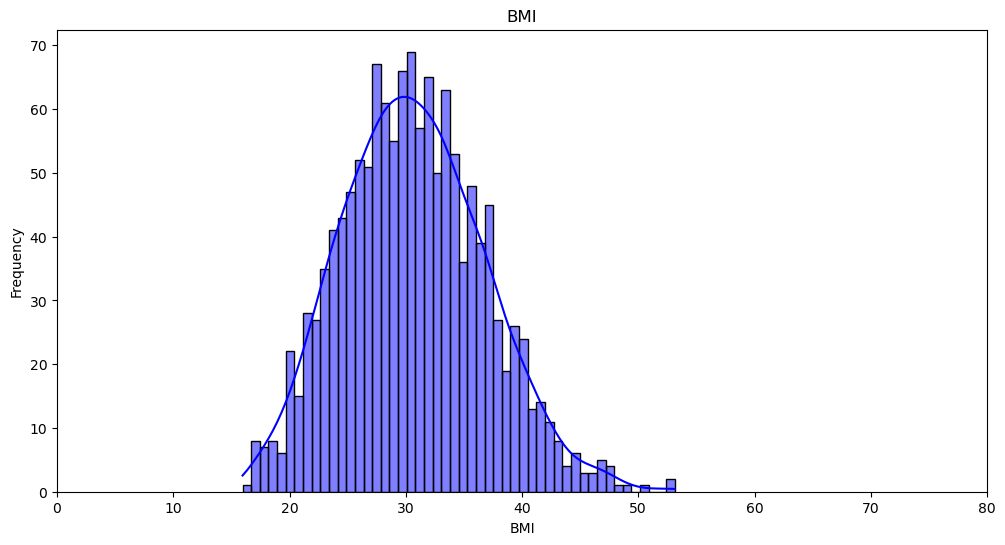

In [278]:
plt.figure(figsize=(12, 6))
sns.histplot(dfI['bmi'], kde=True, bins=50, color='blue')
plt.xticks(np.arange(0,90,10))
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

Shape of Distribution:

>The histogram is right-skewed (positively skewed), meaning there are more individuals with lower BMI values, and fewer individuals with very high BMI values.

>The distribution is roughly bell-shaped but with a longer tail on the right, indicating a small proportion of individuals with very high BMI.

Central Tendency:

>The peak (mode) appears around BMI 25-30, which falls in the overweight category based on BMI classifications.

>This suggests that a large proportion of individuals in the dataset are overweight.

BMI Range and Spread:

>Most individuals have BMI values between 18 and 40, which includes underweight, normal weight, overweight, and obese categories.

>The presence of higher BMI values (above 40) suggests that a small portion of the population is classified as severely obese.



Healthcare Implications:

>Since BMI is a key factor in insurance risk assessment, individuals with higher BMI may be considered at greater risk for conditions like diabetes, heart disease, and hypertension, which could impact insurance premiums and healthcare costs.

>The right-skewed tail indicates a subset of individuals with very high BMI, who may require special healthcare plans or interventions.
Possible Business Insights:

>Wellness Programs: Insurance providers could offer weight management programs targeting individuals in the overweight and obese categories.

>Premium Adjustments: Insurers might use BMI as a risk factor for premium pricing, potentially charging higher premiums for higher BMI ranges.

>Preventive Healthcare Focus: Since a large number of individuals are in the overweight category, insurers could invest in preventive care programs to reduce long-term healthcare costs.

Charges Distribution of the Insured Population

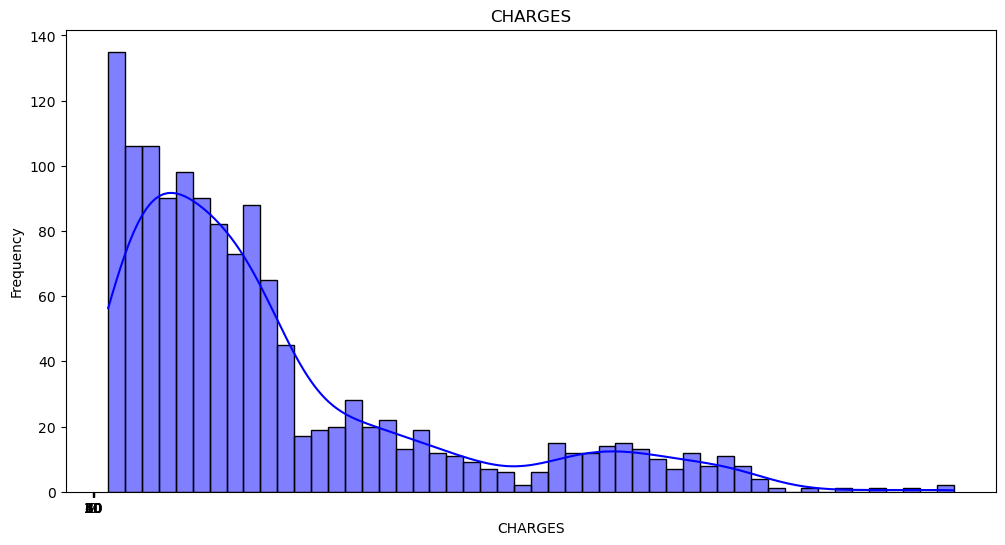

In [279]:
plt.figure(figsize=(12, 6))
sns.histplot(dfI['charges'], kde=True, bins=50, color='blue')
plt.xticks(np.arange(0,90,10))
plt.title('CHARGES')
plt.xlabel('CHARGES')
plt.ylabel('Frequency')
plt.grid(False)

plt.show()

Right-Skewed Distribution

>The histogram shows that most policyholders have lower insurance charges, while a smaller group has significantly higher charges. 

>This suggests that the majority of people pay relatively low premiums, but a few individuals incur very high costs.

Multiple Peaks (Bimodal or Multimodal)

>There appear to be two or more peaks, which may indicate distinct groups within the data. 

Possible reasons:

>One group may consist of healthy individuals with lower charges.

>Another group might include people with chronic conditions, smokers, or older individuals, leading to higher charges.

>Long Tail – The long right tail suggests that while most people have affordable insurance costs, a few have extremely high medical expenses, possibly due to severe health conditions or costly treatments.



Implications for Insurers:

>Risk Assessment – Insurers need to evaluate factors leading to high charges, such as age, medical history, or lifestyle habits (e.g., smoking).

>Premium Structuring – Adjusting premium rates based on risk categories could help balance affordability and profitability.

>Preventive Healthcare Programs – Offering wellness programs could reduce high claims by encouraging healthier lifestyles.

Value Counts of No. of Children

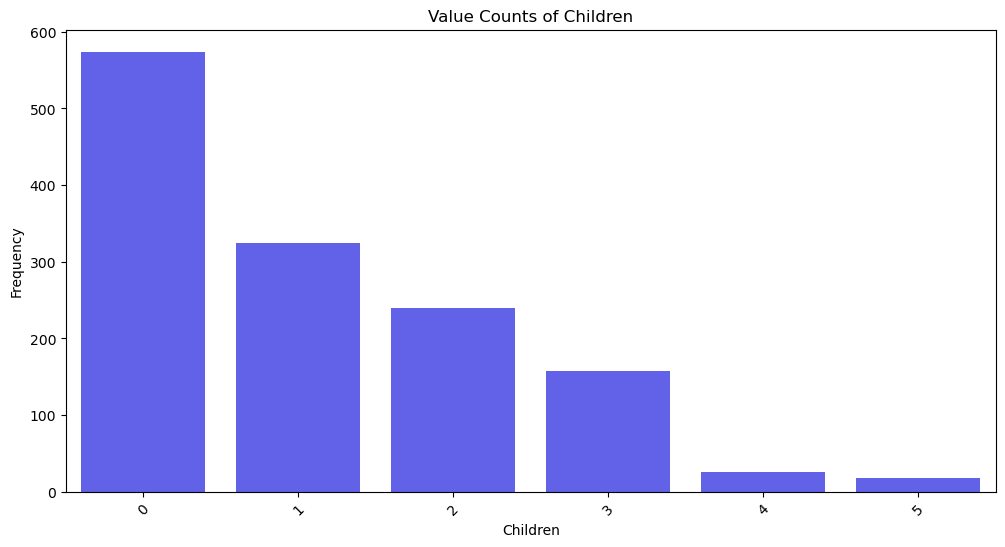

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [280]:
value_counts = df['children'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, color='blue', alpha=0.7)
plt.xlabel("Children")
plt.ylabel("Frequency")
plt.title("Value Counts of Children")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Display value counts
print(value_counts)

Majority Have No Children

>The highest frequency is for individuals with zero children, suggesting a large proportion of policyholders are either young adults, unmarried individuals, or couples without children. 

>These individuals might be purchasing individual plans rather than family plans.

Gradual Decline in Count 
 
>As the number of children increases, the frequency of policyholders decreases. 

This pattern could indicate:

>Families with fewer children are more likely to opt for health insurance.
>Financial constraints may impact larger families' ability to afford health insurance.
>Some families might already be covered under government or employer-sponsored insurance.

Very Few Families with 4 or More Children – The lowest count is for families with 4 or more children, which may reflect:

>A general demographic trend where fewer families have large numbers of children.

>Possible affordability concerns leading to lower enrollment among larger families.



Implications for Insurance Providers:

>Insurers can create plans that better fit young adults and small families since they make up most of the policyholders.

>Custom family insurance plans could be marketed to encourage larger families to enroll.

>Additional discounts or incentives for families with more children could improve policy uptake.

Value Counts of Smoker

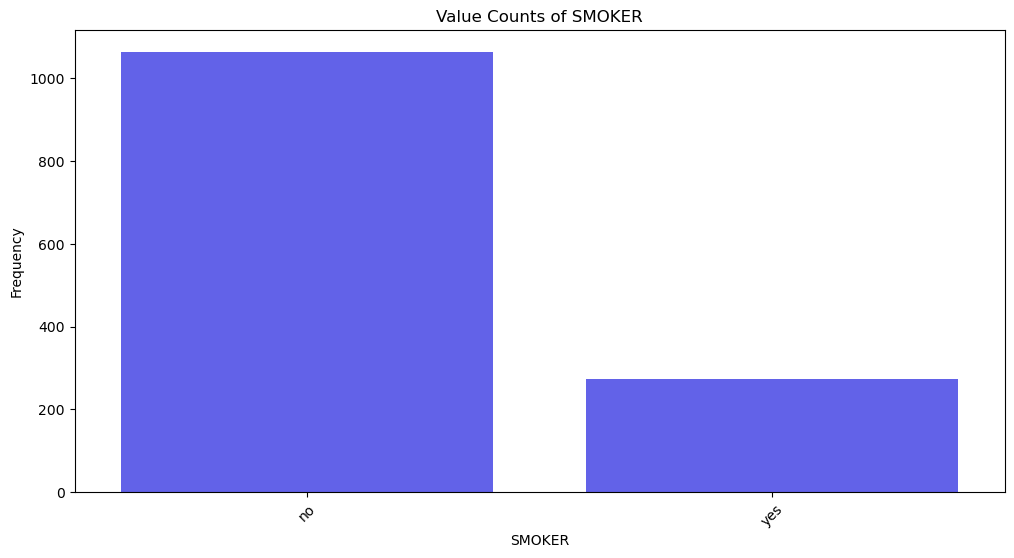

smoker
no     1064
yes     274
Name: count, dtype: int64


In [281]:
value_counts = df['smoker'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, color='blue', alpha=0.7)
plt.xlabel("SMOKER")
plt.ylabel("Frequency")
plt.title("Value Counts of SMOKER")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Display value counts
print(value_counts)

Majority are Non-Smokers

>The bar chart shows that the number of non-smokers is significantly higher than smokers. This suggests that most individuals in the dataset do not smoke.

Smokers are a Minority

>While a smaller group of individuals are smokers, they still represent a significant portion of the dataset. 

>This group is important as smoking is a key factor affecting health risks and insurance costs.



Implications for Health Insurance:

> Higher Premiums for Smokers – Since smoking is linked to higher medical costs, insurers may charge smokers higher premiums to account for the increased risk.

> Preventive Health Programs – Insurers might offer incentives for quitting smoking, such as reduced premiums for non-smokers or discounts for those who participate in smoking cessation programs.

> Risk Assessment – The presence of smokers in the dataset suggests that a portion of policyholders may be at a higher risk of diseases like lung cancer, heart disease, and respiratory conditions, influencing claims and healthcare costs.

Value Counts of Gender Status

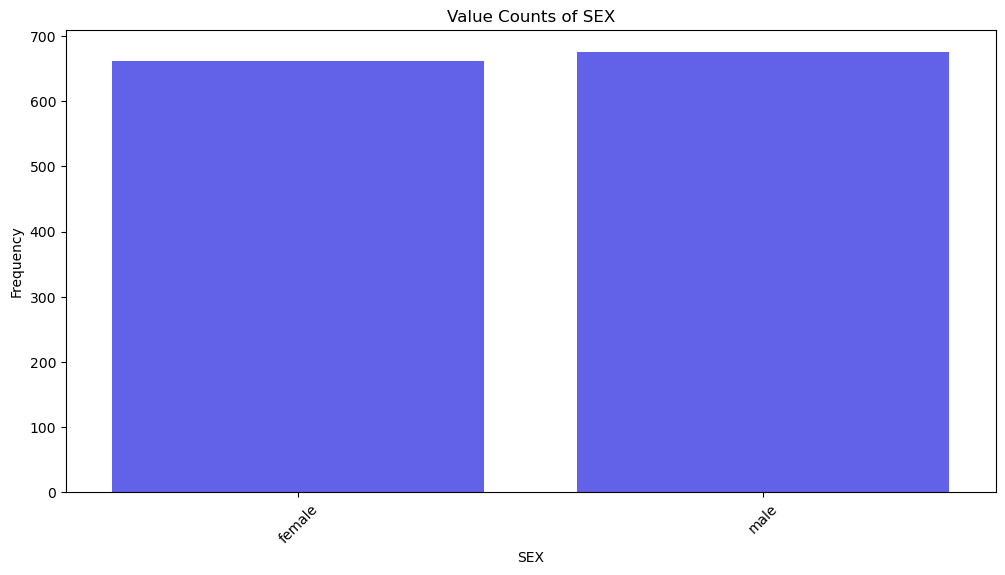

sex
female    662
male      676
Name: count, dtype: int64


In [282]:
value_counts = df['sex'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, color='blue', alpha=0.7)
plt.xlabel("SEX")
plt.ylabel("Frequency")
plt.title("Value Counts of SEX")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Display value counts
print(value_counts)

>Balanced Distribution – The number of males and females in the dataset is nearly equal, indicating that gender does not create any significant bias in the dataset.



Implications for Health Insurance:

>Since both genders are represented almost equally, insurers can design policies that cater to both males and females without significant bias.

>Differences in health risks and medical expenses between genders (e.g., maternity costs for females, higher cardiovascular risks for males) might still play a role in policy pricing.

>Further analysis on medical charges by gender may reveal whether one group incurs higher healthcare costs, influencing premium calculations.

Value Counts By Region

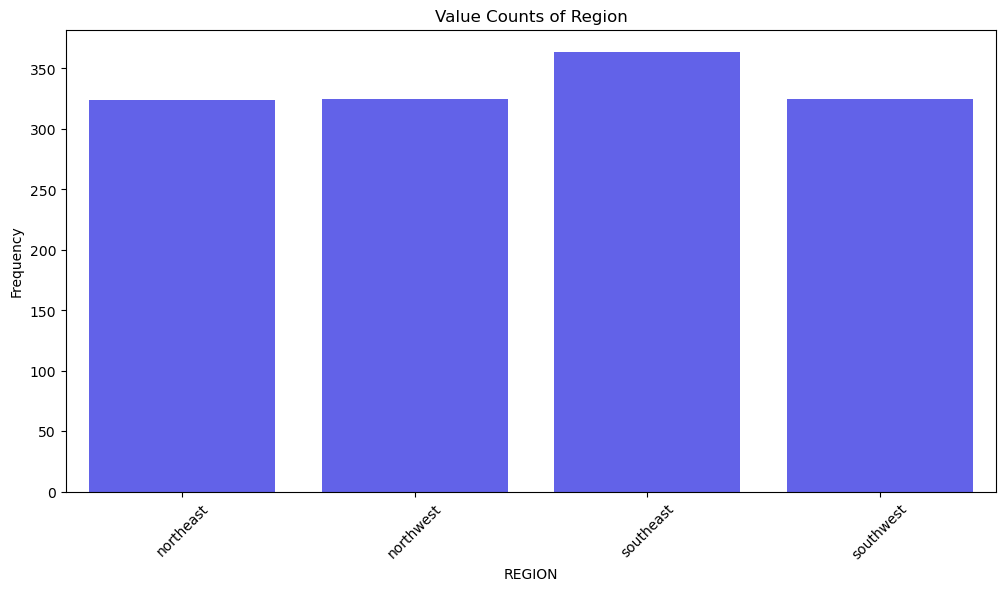

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: count, dtype: int64


In [283]:
value_counts = df['region'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, color='blue', alpha=0.7)
plt.xlabel("REGION")
plt.ylabel("Frequency")
plt.title("Value Counts of Region")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

# Display value counts
print(value_counts)

>Even Distribution Across Regions : The number of individuals from the four regions (Northeast, Northwest, Southeast, Southwest) is fairly balanced, with slight variation.

>Southeast Has the Highest Count : The Southeast region has slightly more individuals compared to the other regions, which might indicate a larger population or higher insurance participation in that area.



Implications for Health Insurance:

>Since all regions have similar representation, there is no strong regional bias in the dataset.

>Insurance companies can design region-specific plans by analyzing regional health trends, medical costs, or risk factors.

>Further investigation into average medical charges by region may reveal if certain regions have higher healthcare expenses, which could impact premium pricing.

Visualizing Ouliers through Boxplot

BMI

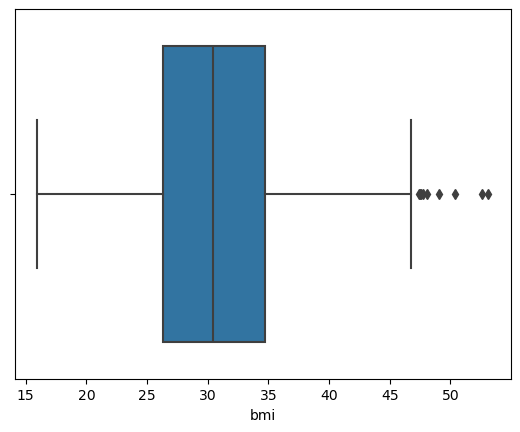

In [284]:
sns.boxplot(dfI,x='bmi')
plt.grid(False)

Analysis:

>Outliers were detected on the higher end of the BMI distribution; however, they were left untreated because elevated BMI values may carry important insights. Rather than removing them, these outliers could help flag high-risk individuals and allow us to focus on them specifically for targeted health interventions or risk-based premium adjustments.

Charges

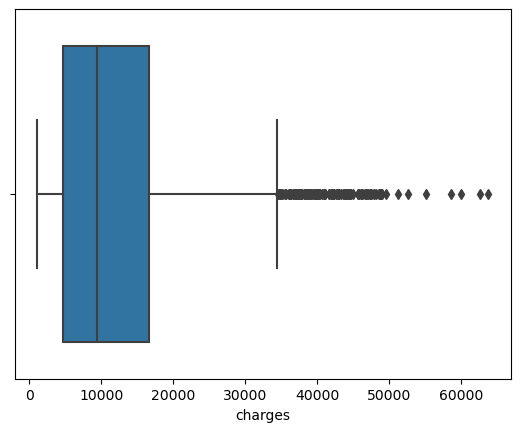

In [285]:
sns.boxplot(dfI,x='charges')
plt.grid(False)

Analysis:
>Outliers were detected on the higher end of the charges distribution; however, they were left untreated because high medical charges may represent critical cases or significant risk factors. Retaining these values allows for more accurate modeling of costly health scenarios and supports risk stratification in insurance analytics.

Correlation Matrix

               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


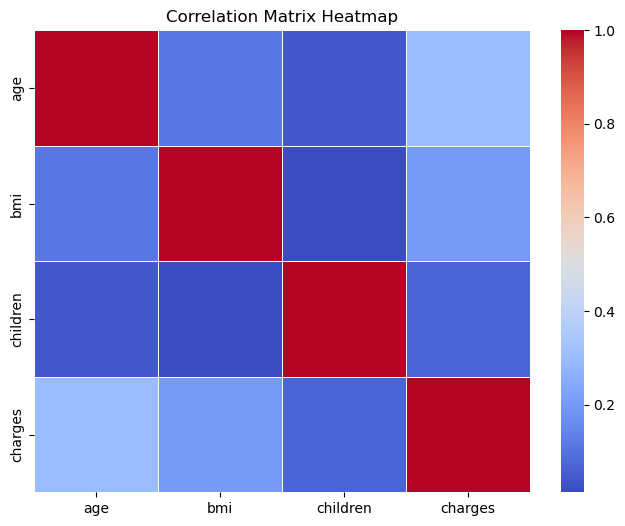

In [286]:
numerical_features = ['age', 'bmi', 'children', 'charges']

corr_matrix = dfI[numerical_features].corr()

print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


Analysis:

>Age and BMI have moderate and weak correlations with charges, implying that factors like age and health-related variables (such as BMI) play a more significant role in determining charges.

>The number of children doesn't appear to have much of an effect on either BMI or charges in this dataset.

>Overall, the dataset shows some relationships, but the correlations are mostly weak to moderate, which suggests that other factors not represented in this data might also play a role in determining charges.

### STATISTICAL ANALYSIS

In [287]:
from statsmodels.stats.weightstats import ztest
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


Medical Charges by Smoking Status

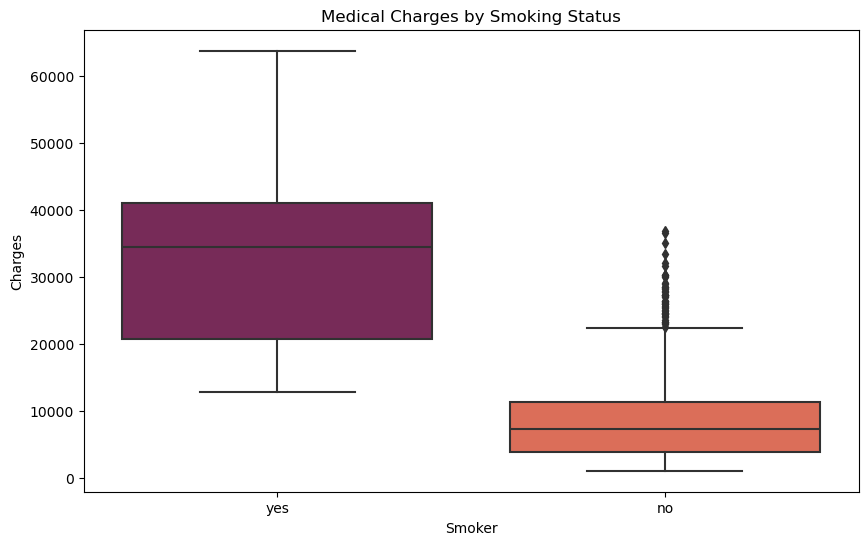

In [288]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['smoker'], y=df['charges'], palette="rocket")

plt.title("Medical Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Charges")

plt.show()

Higher Medical Charges for Smokers

>The median (middle line in the box) for smokers is significantly higher than for non-smokers.

>This suggests that smokers tend to have higher medical expenses compared to non-smokers.

Wider Distribution for Smokers

>The spread (interquartile range, IQR) is much larger for smokers.

>This indicates greater variability in medical charges among smokers.

Presence of Outliers in Non-Smokers

>There are several outliers in the non-smoker category, showing that some non-smokers also have high medical expenses.

>However, the overall distribution is much lower compared to smokers.

Maximum Charges for Smokers Are Very High

>The upper whisker for smokers extends much higher than for non-smokers.

>This indicates that some smokers have extremely high medical expenses.



Conclusion:

>Smoking is associated with higher and more variable medical costs.

>This supports the idea that smoking increases health risks, leading to greater medical expenditures.

Z-Test

In [289]:
# Splitting the data into two groups: smokers and non-smokers
smokers = dfI[dfI['smoker'] == 'yes']['charges']
non_smokers = dfI[dfI['smoker'] == 'no']['charges']

z_stat, p_value = ztest(smokers, non_smokers)

print(f"Z-statistic: {z_stat:.4f}, P-value: {p_value:.4e}")


Z-statistic: 46.6448, P-value: 0.0000e+00


Findings from the Z-test

>Z-statistic = 46.6448 → This is an extremely large Z-score, indicating a significant difference between the two groups.

>P-value = 0.0000 (practically 0) → Since this is far below the standard threshold of 0.05, we reject the null hypothesis.

Conclusion:

>There is a statistically significant difference in medical charges between smokers and non-smokers. Smokers, on average, incur significantly higher medical charges than non-smokers. 

>This finding aligns with the expectation that smoking leads to higher medical expenses due to associated health risks (e.g., lung diseases, cardiovascular issues, etc.).

Business or Healthcare Implications

>Insurance companies could charge higher premiums for smokers due to higher medical costs.

>Healthcare policies could focus on smoking cessation programs to reduce future expenses.

>Employers might consider incentives for employees who quit smoking to reduce healthcare claims.

Medical Charges by Gender Status

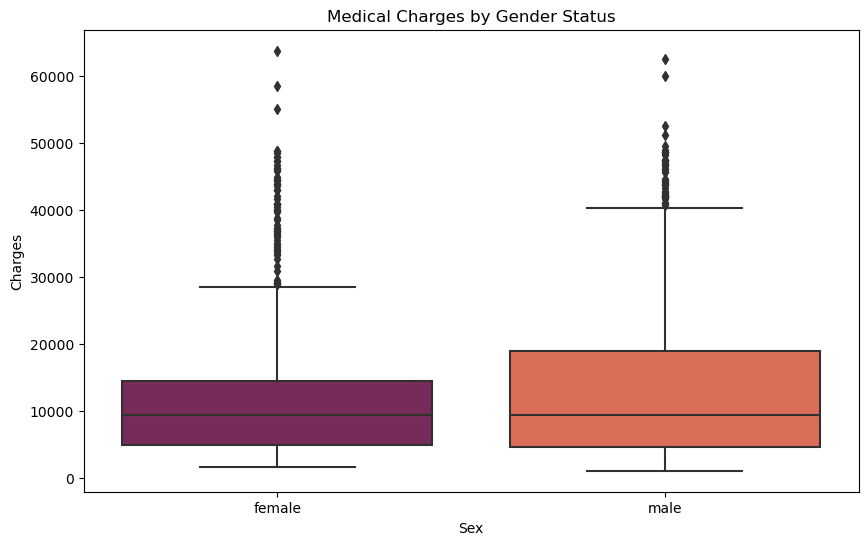

In [290]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sex'], y=df['charges'], palette="rocket")

plt.title("Medical Charges by Gender Status")
plt.xlabel("Sex")
plt.ylabel("Charges")

plt.show()

Similar Median Charges for Males and Females

>The median (central line in the box) for both males and females appears similar, indicating that the typical medical charge is not significantly different between genders.

Greater Variability in Charges for Males

>The interquartile range (IQR) and whiskers for males are slightly larger, indicating more variability in medical expenses for males compared to females.

Presence of High Outliers in Both Genders

>Both male and female categories have several outliers (dots above the whiskers), representing individuals with exceptionally high medical charges.

>However, the magnitude of high-cost outliers is greater for males, suggesting that some males incur significantly higher medical expenses.

Higher Maximum Charges for Males

>The upper whisker and outliers extend higher for males, indicating that the highest medical charges are more extreme for males compared to females.



Conclusion:

>On average, males and females have similar medical expenses, but males tend to show more variation and higher extreme values.

>The outliers could be investigated further to check if other factors, such as smoking, age, or chronic conditions, contribute to higher costs.

Z-Test

In [291]:
# Splitting the data into two groups: male and female
male = dfI[dfI['sex'] == 'male']['charges']
female = dfI[dfI['sex'] == 'female']['charges']

z_stat, p_value = ztest(male, female)

print(f"Z-statistic: {z_stat:.4f}, P-value: {p_value:.4e}")

Z-statistic: 2.1244, P-value: 3.3637e-02


Findings from the Z-test

>Z-statistic = 2.1244 → This indicates a moderate difference between the two groups.

>P-value = 0.0336 → Since this is less than 0.05, we reject the null hypothesis at the 5% significance level.

Conclusion:

>There is a statistically significant difference between the two groups, but the effect is not very strong. 

>The difference may be meaningful, but further analysis (such as effect size measurement) is needed to determine its practical significance.

Medical Charges by Region Status

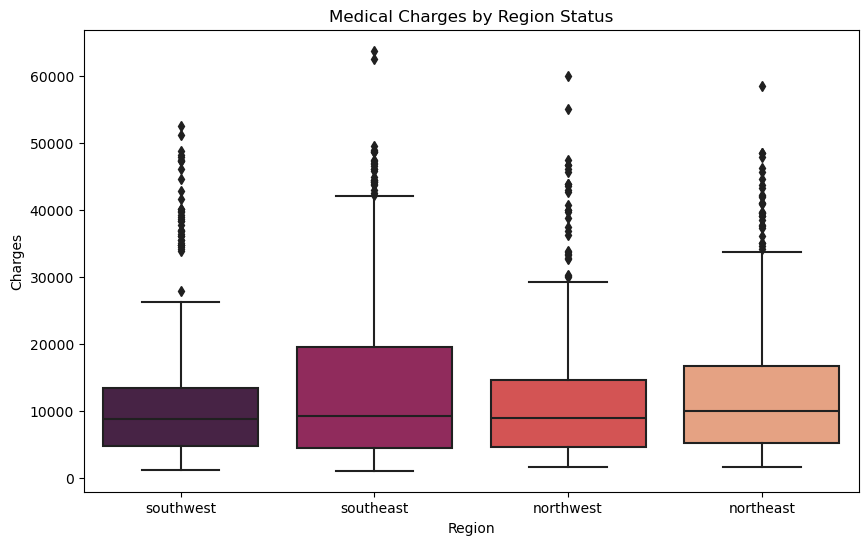

In [292]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['region'], y=df['charges'], palette="rocket")

plt.title("Medical Charges by Region Status")
plt.xlabel("Region")
plt.ylabel("Charges")

plt.show()

Similar Medians Across Regions

>The median medical charges (central line in each box) appear fairly similar across the four regions (Southwest, Southeast, Northwest, and Northeast). This suggests that the typical medical cost does not vary significantly by region.

Southeast Region Has the Highest Variability

>The Southeast region has a wider interquartile range (IQR) and a higher number of extreme outliers compared to other regions.

>This indicates that some individuals in this region incur significantly higher medical charges.

Presence of Outliers in All Regions

>All regions exhibit several outliers (dots above the whiskers), indicating that some people face exceptionally high medical expenses.

>The Southeast and Northeast regions have the most extreme outliers, suggesting the presence of high medical cost cases.

Southwest Region Has the Lowest Maximum Charges

>The upper whiskers and outliers in the Southwest region are lower compared to the other regions.

>This suggests that the most expensive medical cases are less extreme in the Southwest compared to other regions.


Conclusion

>The median medical expenses are relatively consistent across regions.

>The Southeast region shows the highest variability and the most extreme medical charges.

>The Southwest region has relatively lower maximum charges.


ANOVA

In [293]:
model = ols('charges ~ C(region)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq      df         F    PR(>F)
C(region)  1.300760e+09     3.0  2.969627  0.030893
Residual   1.947735e+11  1334.0       NaN       NaN


Findings from ANOVA (Charges vs. Region)

>F-statistic = 2.9696 → This indicates a moderate variance between the groups.

>P-value = 0.0309 → Since this is less than 0.05, we reject the null hypothesis at the 5% significance level.

Conclusion:

>There is a statistically significant difference in medical charges across different regions. 
>However, since the F-statistic is relatively low, the variation in charges due to region might not be very strong.









Tukey's HSD test

       Multiple Comparison of Means - Tukey HSD, FWER=0.01       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7245 -3947.7208 1970.1025  False
northeast southeast  1329.0269 0.4745 -1549.6628 4207.7166  False
northeast southwest -1059.4471 0.6792 -4018.3588 1899.4645  False
northwest southeast  2317.8361 0.0583  -558.5096 5194.1817  False
northwest southwest    -70.638 0.9999 -3027.2691 2885.9932  False
southeast southwest -2388.4741 0.0477 -5264.8197  487.8716  False
-----------------------------------------------------------------


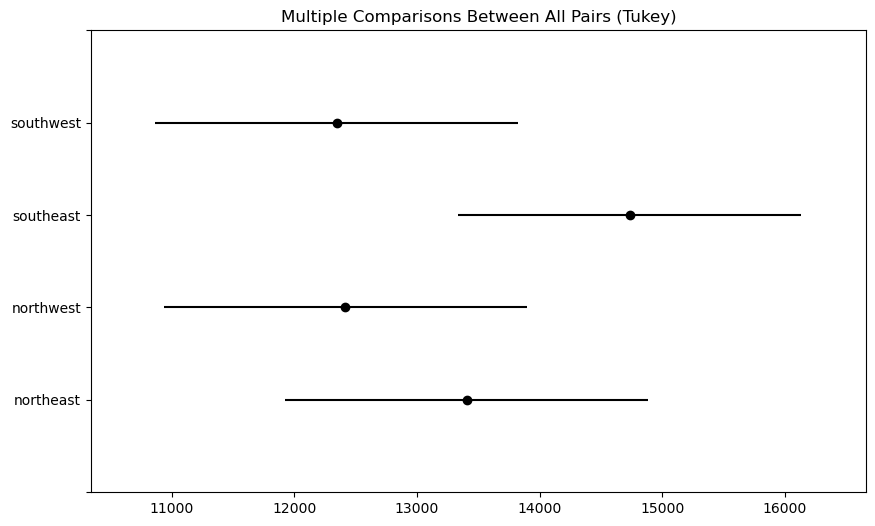

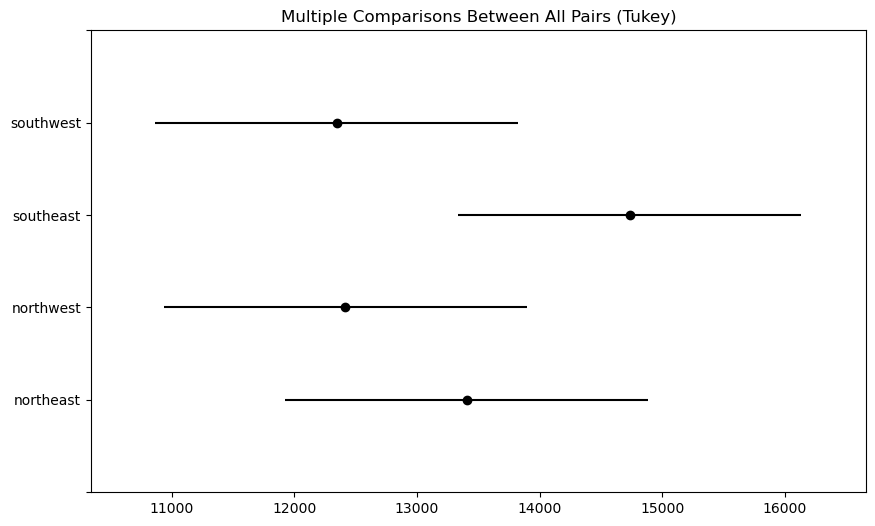

In [294]:
tukey = pairwise_tukeyhsd(endog=df['charges'],     # Dependent variable
                          groups=df['region'],       # Grouping variable
                          alpha=0.01)                        # Significance level

print(tukey.summary())

tukey.plot_simultaneous()    # Shows confidence intervals for the differences between group means


Findings from Tukey's HSD Test (Charges vs. Region)

>Objective: Tukey's HSD test compares the mean medical charges across different regions to determine if any pairwise differences are statistically significant.

Key Observations:

>All p-values are greater than 0.01, meaning no comparisons are statistically significant at the 1% significance level (FWER=0.01).

>The closest to significance is southeast vs. southwest (p = 0.0477), but it is not significant at the 1% level (only at the 5% level).

Conclusion:

>There is no strong evidence of significant differences in medical charges among the regions at the 1% significance level. 
>Although the southeast and southwest regions show a difference at the 5% level, the effect is not strong enough under stricter statistical control.

Final Note: Since ANOVA indicated an overall difference, but Tukey’s test did not confirm significant pairwise differences at 1%, it suggests that regional effects on charges are small and not highly distinct between specific regions.

Medical Charges by Children Status

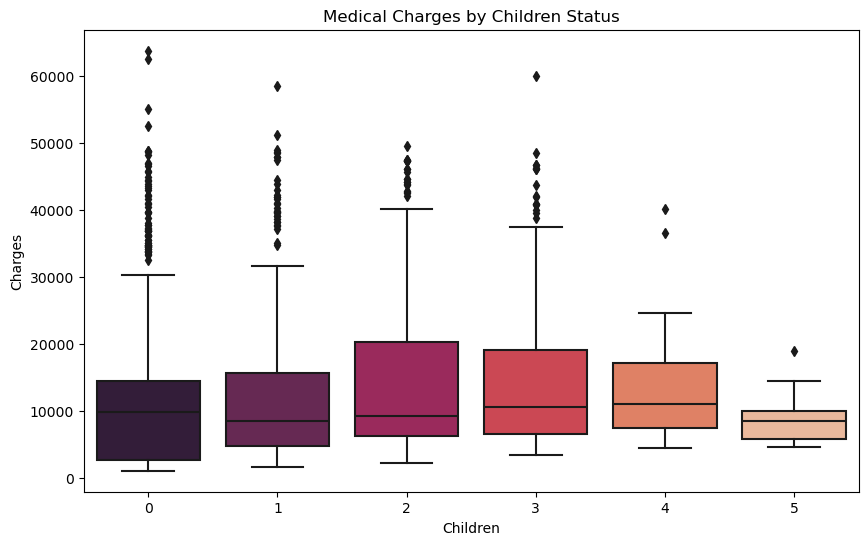

In [295]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['children'], y=df['charges'], palette="rocket")

plt.title("Medical Charges by Children Status")
plt.xlabel("Children")
plt.ylabel("Charges")

plt.show()

Similar Medians Across Different Numbers of Children

>The median medical charges (middle line in each box) appear fairly consistent across all groups (0 to 5 children).

>This suggests that having more children does not significantly affect the median medical costs.

Higher Variability for Fewer Children (0-3)

>Individuals with 0, 1, 2, or 3 children show a wider interquartile range (IQR) and more outliers.

>This suggests that medical expenses vary more in these groups, potentially due to other influencing factors like smoking, BMI, or chronic diseases.

Lower Medical Charges for Parents with 4 or 5 Children

>The IQR and whiskers are smaller for families with 4 or 5 children, indicating less variation in medical expenses.

>These groups also lack extreme high-cost outliers, suggesting that very high medical costs are less common for larger families.

Presence of Outliers in All Groups

>Some individuals in every category (0-5 children) experience very high medical charges (outliers), possibly due to significant health conditions or lifestyle factors.



Conclusion

>Median medical expenses do not vary significantly with the number of children.

>More children (4-5) are associated with lower variation in medical costs.

>Families with 0-3 children show higher variability and more expensive cases.

ANOVA

In [296]:
model = ols('charges ~ C(children)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq      df        F    PR(>F)
C(children)  2.396917e+09     5.0  3.29692  0.005786
Residual     1.936773e+11  1332.0      NaN       NaN


F-statistic = 3.2969
>This indicates a moderate variance in medical charges between different numbers of children.

P-value = 0.005786
>Since this is less than 0.05, we reject the null hypothesis at the 5% significance level.

Conclusion: 
>There is a statistically significant difference in medical charges across groups based on the number of children. However, since the F-statistic is not very high, the effect size or strength of association may not be very strong.

Tukey's HSD test

    Multiple Comparison of Means - Tukey HSD, FWER=0.01     
group1 group2  meandiff  p-adj     lower      upper   reject
------------------------------------------------------------
     0      1   365.1962  0.998  -2459.3662 3189.7587  False
     0      2  2707.5881 0.0413   -416.9951 5832.1713  False
     0      3  2989.3428  0.066   -671.6121 6650.2976  False
     0      4  1484.6807 0.9909  -6820.1144 9789.4758  False
     0      5 -3579.9404 0.8169 -13309.8793 6149.9986  False
     1      2  2342.3919 0.2025  -1119.4154 5804.1992  False
     1      3  2624.1465 0.2211  -1328.5336 6576.8266  False
     1      4  1119.4845 0.9978  -7317.9743 9556.9433  False
     1      5 -3945.1366 0.7562 -13788.5507 5898.2775  False
     2      3   281.7546 0.9999  -3890.6005 4454.1098  False
     2      4 -1222.9074 0.9968  -9765.4819  7319.667  False
     2      5 -6287.5285 0.2705 -16221.1919 3646.1349  False
     3      4 -1504.6621 0.9924   -10257.67 7248.3459  False
     3      5 -6569.2831

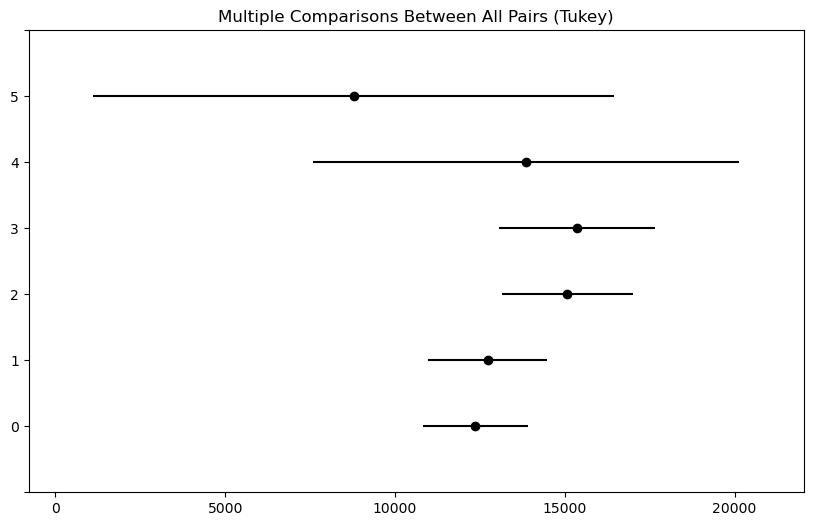

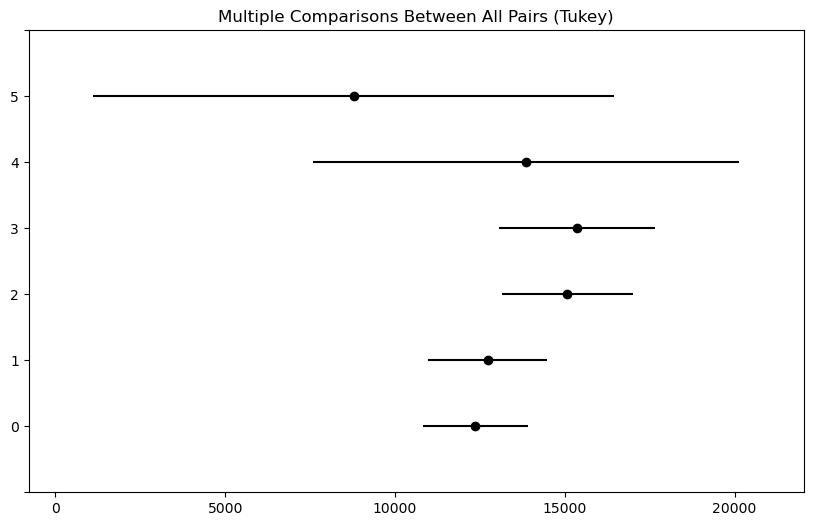

In [297]:
tukey = pairwise_tukeyhsd(endog=df['charges'],     # Dependent variable
                          groups=df['children'],       # Grouping variable
                          alpha=0.01)                        # Significance level

print(tukey.summary())

tukey.plot_simultaneous()    # Shows confidence intervals for the differences between group means


Findings from Tukey's HSD Test (Charges vs. Number of Children)

>Objective: Tukey's HSD test compares the mean medical charges between each pair of child-count groups to determine whether any specific group differences are statistically significant.

Key Observations:
>All adjusted p-values are greater than 0.01, indicating that none of the pairwise comparisons are statistically significant at the 1% significance level (FWER = 0.01).

>The only pair with a p-value below 0.05 is:
Group 0 vs Group 2 (p = 0.0413)
However, this is not significant at the stricter 1% level, only at the 5% level.

>All other group pairs have high p-values (often > 0.7), with confidence intervals crossing zero, indicating no clear difference in charges.

Conclusion:
>There is no strong evidence of significant differences in medical charges among the different child groups at the 1% significance level. Although the group with 0 vs 2 children shows a difference at the 5% level, the effect size and strength are not robust enough under stricter statistical control.

Final Note:

Even though the ANOVA indicated an overall difference in charges by number of children, Tukey’s post-hoc test did not confirm significant pairwise differences at the 1% level. This suggests that while child count may influence charges overall, the differences between specific child-count groups are not sharply distinct.
